                           files   iteration  pi_estimate  obtained
3    thread_32_iter_31250000.out    31250000     3.141593  0.041371
1    thread_32_iter_62500000.out    62500000     3.141593  0.080865
4   thread_32_iter_125000000.out   125000000     3.141593  0.163087
2   thread_32_iter_250000000.out   250000000     3.141593  0.305266
5   thread_32_iter_500000000.out   500000000     3.141593  0.594098
6  thread_32_iter_1000000000.out  1000000000     3.141593  1.180940
0  thread_32_iter_2000000000.out  2000000000     3.141593  2.345706


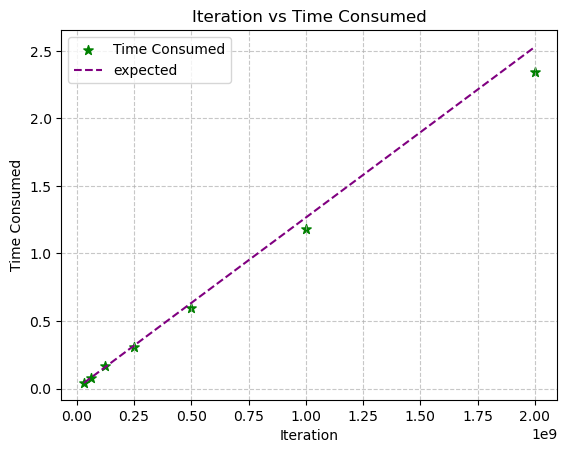

In [5]:
import os
import re
import pandas as pd

def extract_pi_estimate_and_obtained(file_content):
    pi_estimate_match = re.search(r'Pi estimate: (\d+\.\d+)', file_content)
    obtained_match = re.search(r'obtained in (\d+\.\d+) seconds', file_content)

    if pi_estimate_match and obtained_match:
        pi_estimate = float(pi_estimate_match.group(1))
        obtained = float(obtained_match.group(1))
        return pi_estimate, obtained
    else:
        return None, None

def process_iterations_out_files(folder_path, file_name_prefix='thread_32_iter_'):
    iteration_list, pi_estimate_list, obtained_list = [], [], []
    # Get a list of files in a folder starting with 'thread_32_iter_'
    file_list = [f for f in os.listdir(folder_path) if f.startswith(file_name_prefix)]


    for file_name in file_list:
        iteration_match = re.search(file_name_prefix+'(\d+)', file_name)
        if iteration_match:
            iteration = int(iteration_match.group(1))
        else:
            iteration = None

        file_path = os.path.join(folder_path, file_name)
        
        with open(file_path, 'r') as file:
            file_content = file.read()
        pi_estimate, obtained = extract_pi_estimate_and_obtained(file_content)

        if pi_estimate is not None and obtained is not None:
            # print(f"File: {file_name}")
            # print(f"Iteration: {iteration}")
            # print(f"Pi estimate: {pi_estimate}")
            # print(f"Obtained in {obtained} seconds\n")

            iteration_list.append(iteration)
            pi_estimate_list.append(pi_estimate)
            obtained_list.append(obtained)

    data = {'files': file_list,'iteration': iteration_list, 'pi_estimate': pi_estimate_list, 'obtained': obtained_list}
    data_frame = pd.DataFrame(data)
    return data_frame

folder_path = '../output/'
df = process_iterations_out_files(folder_path)
df = df.sort_values(by=['iteration'])
print(df)


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['iteration'], df['obtained'], marker='*', label='Time Consumed', color='green', s=50)
# plt.plot(df['iteration'], df['obtained'], marker='*', label='Time Consumed', color='orange', linestyle='-', markersize=8)

fit_params = np.polyfit(df['iteration'][:2], df['obtained'][:2], 1)
fit_line = np.poly1d(fit_params)

plt.plot(df['iteration'], fit_line(df['iteration']), linestyle='--', color='purple', label='expected')

plt.title('Iteration vs Time Consumed')
plt.xlabel('Iteration')
plt.ylabel('Time Consumed')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

    cpus  pi_estimate   obtained   speed_up
0      1     3.141593  36.418847   1.000000
1      8     3.141593   4.691736   7.762339
2     12     3.141593   3.122340  11.663959
3     16     3.141593   2.355710  15.459818
4     20     3.141593   1.933689  18.833870
5     24     3.141593   1.580074  23.048824
6     28     3.141593   1.357894  26.820096
7     32     3.141593   1.191409  30.567880
8     36     3.141593   1.534962  23.726221
9     40     3.141593   1.467548  24.816120
10    44     3.141593   1.405894  25.904405
11    48     3.141593   1.191885  30.555672


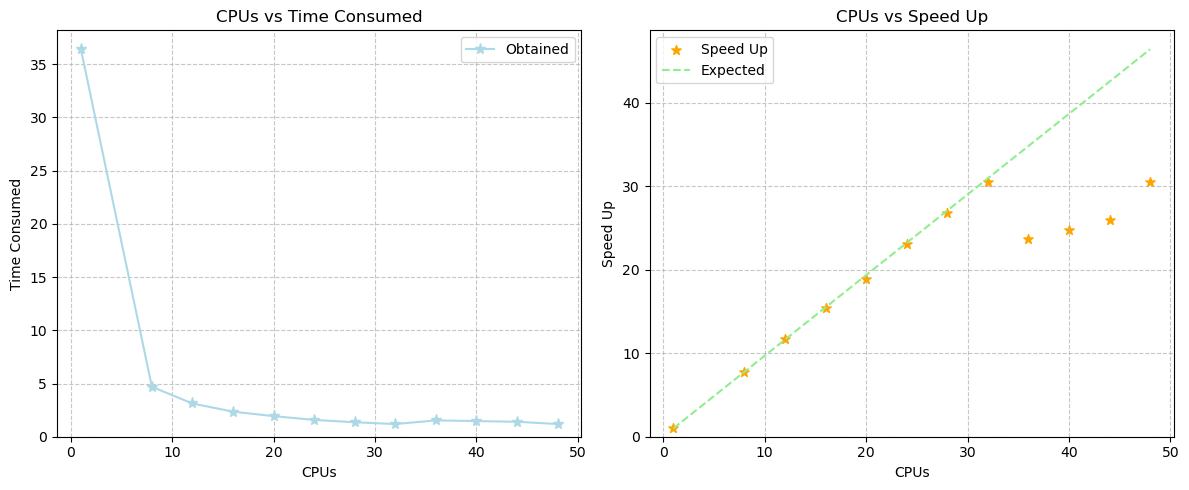

In [6]:
import re
import pandas as pd

def extract_values_from_file(file_path):
    cpu_pattern = re.compile(r'CPUS:  (\d+)')
    pi_estimate_pattern = re.compile(r'Pi estimate: (\S+), obtained in (\S+) seconds')

    cpus_list = []
    pi_estimate_list = []
    obtained_list = []

    with open(file_path, 'r') as file:
        content = file.read()

        cpus_matches = cpu_pattern.findall(content)
        pi_estimate_matches = pi_estimate_pattern.findall(content)

        for cpus in cpus_matches:
            cpus_list.append(int(cpus))

        for pi_estimate, obtained in pi_estimate_matches:
            pi_estimate_list.append(float(pi_estimate))
            obtained_list.append(float(obtained))

    data = {'cpus': cpus_list, 'pi_estimate': pi_estimate_list, 'obtained': obtained_list}
    df = pd.DataFrame(data)
    return cpus_list, pi_estimate_list, obtained_list, df


file_path = '../output/thread_8-48.out'
cpus, pi_estimate, obtained, df = extract_values_from_file(file_path)

# TODO: 修改这个baseline
baseline_time = df['obtained'].iloc[0]  # 目前第一个cpu是8个的
df['speed_up'] = baseline_time / df['obtained']

print(df)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Time Consumed
# axs[0].scatter(df['cpus'], df['obtained'], marker='*', label='Time Consumed', color='orange', s=50)
axs[0].plot(df['cpus'], df['obtained'], marker='*', label='Obtained', color='lightblue', linestyle='-', markersize=8)
# fit_params_1 = np.polyfit(df['cpus'][:2], df['obtained'][:2], 1)
# fit_line_1 = np.poly1d(fit_params_1)
# axs[0].plot(df['cpus'], fit_line_1(df['cpus']), linestyle='--', color='lightgreen', label='Expected')
axs[0].set_title('CPUs vs Time Consumed')
axs[0].set_ylim(bottom=0)
axs[0].set_xlabel('CPUs')
axs[0].set_ylabel('Time Consumed')
axs[0].grid(True, linestyle='--', alpha=0.7)
axs[0].legend()

# Speed Up
axs[1].scatter(df['cpus'], df['speed_up'], marker='*', label='Speed Up', color='orange', s=50)
# axs[1].plot(df['cpus'], df['obtained'], marker='*', label='Obtained', color='orange', linestyle='-', markersize=8)
fit_params_2 = np.polyfit(df['cpus'][:2], df['speed_up'][:2], 1)
fit_line_2 = np.poly1d(fit_params_2)
axs[1].plot(df['cpus'], fit_line_2(df['cpus']), linestyle='--', color='lightgreen', label='Expected')
axs[1].set_title('CPUs vs Speed Up')
axs[1].set_ylim(bottom=0)
axs[1].set_xlabel('CPUs')
axs[1].set_ylabel('Speed Up')
axs[1].grid(True, linestyle='--', alpha=0.7)
axs[1].legend()


plt.tight_layout()
plt.show()

In [21]:
df

,cpus,pi_estimate,obtained
0,1,3.141593,36.418847
1,8,3.141593,4.691736
2,12,3.141593,3.122340
3,16,3.141593,2.355710
4,20,3.141593,1.933689
5,24,3.141593,1.580074
6,28,3.141593,1.357894
7,32,3.141593,1.191409
8,36,3.141593,1.534962
9,40,3.141593,1.467548


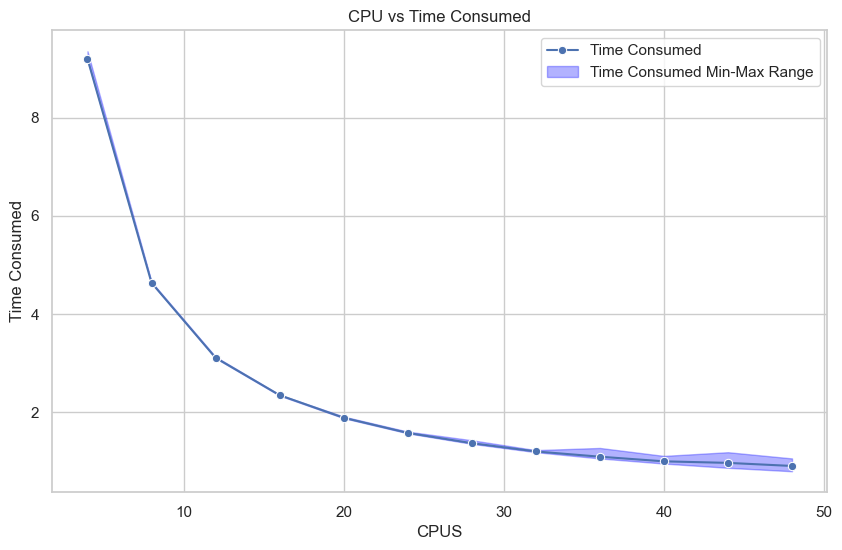

In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

_, _, _, df_all = extract_values_from_file('../output/pi_4966350.out')
df_all = df_all.iloc[1:] # ignore the repeated row

start_with = 1 # make it 1 to ignore the first row, to show a more obvious min-max range
result_df = df_all.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = df_all.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = df_all.groupby('cpus').max().reset_index().iloc[start_with:]

# print(df_all)
baseline_time = result_df['obtained'].iloc[0]
result_df['speed_up'] = baseline_time / result_df['obtained']
result_df

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='cpus', y='obtained', data=result_df, label='Time Consumed', marker='o')
plt.fill_between(result_df['cpus'], df_min['obtained'], df_max['obtained'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')


plt.xlabel('CPUS')
plt.ylabel('Time Consumed')
plt.title('CPU vs Time Consumed')
plt.legend()
plt.grid(True)
plt.show()
# print(df_all)

/var/folders/nc/dsd_hp6104g99c68w02cl3cr0000gn/T/ipykernel_3286/1695361054.py:20: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]


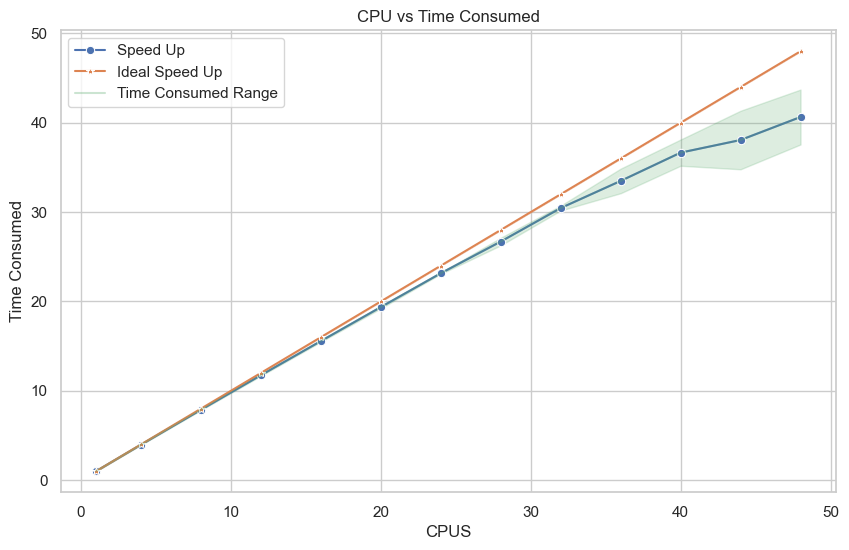

,cpus,pi_estimate,obtained,speed_up
0,1,3.141593,36.515365,1.000000
1,4,3.141593,9.199266,3.969445
2,8,3.141593,4.635715,7.876998
3,12,3.141593,3.108101,11.748563
4,16,3.141593,2.345467,15.568507
5,20,3.141593,1.885464,19.367156
6,24,3.141593,1.576875,23.156791
7,28,3.141593,1.367857,26.701138
8,32,3.141593,1.199272,30.450269
9,36,3.141593,1.092332,33.487168


In [178]:
import pandas as pd

_, _, _, df_all = extract_values_from_file('../output/pi_4966350.out')
df_all = df_all.iloc[1:] # ignore the repeated row


group_size = 13
result_df = pd.DataFrame(columns=df_all.columns)


for i in range(0, len(df_all), group_size):
    first_obtained = df_all['obtained'].iloc[i]
    group_df = df_all.iloc[i:i+group_size].copy()
    group_df['speed_up'] = first_obtained / group_df['obtained']
    result_df = pd.concat([result_df, group_df])

result_df['ideal_speed_up'] = result_df['cpus']

start_with = 0 # make it 1 to ignore the first row, to show a more obvious min-max range
df_all = result_df.groupby('cpus').mean().reset_index().iloc[start_with:]
df_min = result_df.groupby('cpus').min().reset_index().iloc[start_with:]
df_max = result_df.groupby('cpus').max().reset_index().iloc[start_with:]
df_min

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(x='cpus', y='speed_up', data=df_all, label='Speed Up', marker='o')
sns.lineplot(x='cpus', y='ideal_speed_up', data=result_df, label='Ideal Speed Up', marker='*')
# plt.fill_between(df_all['cpus'], df_min['speed_up'], df_max['speed_up'], color='blue', alpha=0.3, label='Time Consumed Min-Max Range')
# Use lineplot with ci parameter to add confidence interval
sns.lineplot(x='cpus', y='speed_up', data=result_df, ci='sd', label='Time Consumed Range', alpha=0.3)



plt.xlabel('CPUS')
plt.ylabel('Time Consumed')
plt.title('CPU vs Time Consumed')
plt.legend()
plt.grid(True)
plt.show()

df_all